In [1]:
from peak_warming_calculator_Pretis  import *
import matplotlib.pyplot as plt

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt
import matplotlib.cm as cm

In [3]:
import time

# Sensitivity Analysis

In [4]:
r_minus_g = 0.015
consumption_growth = 0.03
consumption_discount = consumption_growth + r_minus_g

In [5]:
problem = {
'num_vars': 6,
'names': ['gamma', 'D0', 'P_100', 'P_50/P_100', 's/r', 'TCRE_1'],
'bounds': [
[2*0.95, 2*1.05],
[0.00236*0.95, 0.00236*1.05],
[300*0.95, 300*1.05],
[0.4*0.95, 0.4*1.05],
[2*0.95, 2*1.05],
[0.00054*0.95, 0.00054*1.05]]
}

# Generate samples
param_values = saltelli.sample(problem, 16)    

In [6]:
param_values[0]

array([1.918750e+00, 2.352625e-03, 2.990625e+02, 4.062500e-01,
       1.956250e+00, 5.653125e-04])

In [7]:
len(param_values)

224

In [8]:
peak_T_list = []

for i in range(len(param_values)):
    if i % 32 == 0:
        print(i)
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        print(current_time)
    
    gamma = param_values[i][0]
    D0 = param_values[i][1]
    P_100 = param_values[i][2]
    P_50 = param_values[i][3] * P_100
    r = consumption_discount
    s = param_values[i][4]*r
    T_TCRE_1 = param_values[i][5]
    
    peak_T = peak_warming_calculator_Pretis(P_50=P_50, P_100=P_100, gamma=gamma, D0=D0, g_0=consumption_growth, r_minus_g=r_minus_g, s=s, r=r, T_TCRE_1=T_TCRE_1)
    peak_T_list.append(peak_T)

0
14:11:16


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:128: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


P0_Nordhaus = 23.429866201300523


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator_Pretis.py:155: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


P0_Nordhaus = 25.69794582805547
P0_Nordhaus = 24.196817952681617
P0_Nordhaus = 23.429866201300523
P0_Nordhaus = 23.28870321009801
P0_Nordhaus = 23.419559037205083
P0_Nordhaus = 21.9280022674226
P0_Nordhaus = 22.51147158313997
P0_Nordhaus = 23.884195842308795
P0_Nordhaus = 24.656298340669952
P0_Nordhaus = 24.817564521208407
P0_Nordhaus = 24.66732413055005
P0_Nordhaus = 26.328920779446747
P0_Nordhaus = 24.656298340669952
P0_Nordhaus = 25.636233267978472
P0_Nordhaus = 22.785441874464947
P0_Nordhaus = 24.313548720027114
P0_Nordhaus = 25.636233267978472
P0_Nordhaus = 25.8064223525179
P0_Nordhaus = 25.625583448295334
P0_Nordhaus = 26.98488884198147
P0_Nordhaus = 25.764912744813795
P0_Nordhaus = 24.116638295118047
P0_Nordhaus = 22.84818815295894
P0_Nordhaus = 22.716718762745256
P0_Nordhaus = 22.857390504221968
P0_Nordhaus = 21.693773184531153
P0_Nordhaus = 22.84818815295894
P0_Nordhaus = 24.50576963115405
P0_Nordhaus = 24.199968200757716
P0_Nordhaus = 24.235140496671715
P0_Nordhaus = 24.68008

                  ST   ST_conf
gamma       0.066885  0.048332
D0          0.010158  0.006688
P_100       0.492279  0.251783
P_50/P_100  0.308088  0.160116
s/r         0.000996  0.000712
TCRE_1      0.022688  0.014463
                  S1   S1_conf
gamma       0.079627  0.171427
D0          0.098601  0.067902
P_100       0.628939  0.388268
P_50/P_100  0.368517  0.409311
s/r        -0.016465  0.017215
TCRE_1      0.012540  0.104440
                            S2   S2_conf
(gamma, D0)          -0.003929  0.301363
(gamma, P_100)       -0.012618  0.327697
(gamma, P_50/P_100)  -0.010570  0.279100
(gamma, s/r)          0.019239  0.276114
(gamma, TCRE_1)       0.055517  0.266092
(D0, P_100)          -0.155198  0.110351
(D0, P_50/P_100)     -0.096528  0.099678
(D0, s/r)            -0.094211  0.092824
(D0, TCRE_1)         -0.097511  0.091723
(P_100, P_50/P_100)  -0.212817  0.541021
(P_100, s/r)         -0.049243  0.624384
(P_100, TCRE_1)      -0.051531  0.625426
(P_50/P_100, s/r)     0.040043  0

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

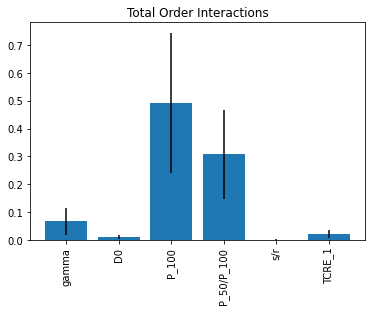

In [9]:
peak_T_list = np.asarray(peak_T_list)

Si = sobol.analyze(problem, peak_T_list, print_to_console=True)

total_Si, first_Si, second_Si = Si.to_df()

plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)